# Matplotlib - Heatmap
Demo on prepararing a heatmap which will be used to visually review machine learning classification results

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# define function takes in X (0th row is X0 and 1st row is X1) and returns 0 and 1 vector
def func_Y(X):
    # generate function of 0 and 1: Y = 0 if X[0,:] + X1[1,:]-0.75<=0 and Y=1 if x0[0,:]+x1[1,:]-0.75>0
    Y = Y = (X[0,:] + X[1,:] - 0.75 > 0).astype(float)
    # add axis so Y is row vector
    Y = np.expand_dims(Y,axis=0)
    return Y

In [10]:
# (1) set up training data randomly chosen from uniform distribution
# X is 2d array of dimension (2,m), Y is 2d array of 0 or 1 of dimension (1,m)
nfeature = 2
m = 1000
X = np.random.rand(nfeature,m)
Y = func_Y(X)
print("X.shape: {}".format(X.shape))
print("Y.shape: {}".format(Y.shape))

X.shape: (2, 1000)
Y.shape: (1, 1000)


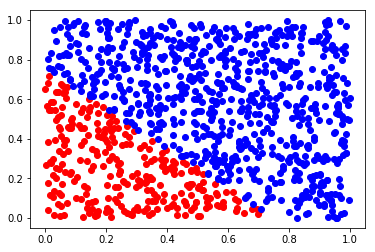

In [11]:
# (2) plot training data
# red = 0, 1 = blue, use np.where to determine index where Y = 0 and Y = 1
idx_0 = np.where(np.squeeze(np.absolute(Y-0))<1e-10)
idx_1 = np.where(np.squeeze(np.absolute(Y-1))<1e-10)
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")

## Meshgrid
Use to create 2d grid of points in plane

In [12]:
# simple example points 0.25, 0.50, 0.75 in x0 and x1 directions
npoint = 3
# create 1d grids
X0=np.linspace(0.25,0.75,npoint)
X1=np.linspace(0.25,0.75,npoint)
print("X0: {}".format(X0))
print("X1: {}".format(X1))
# create meshgrids
X0grid,X1grid=np.meshgrid(X0,X1)
print("x0grid: \n{}".format(X0grid))
print("x1grid: \n{}".format(X1grid))
# convert meshgrids into 1d grids
X0reshape=np.reshape(X0grid,(1,npoint*npoint))
X1reshape=np.reshape(X1grid,(1,npoint*npoint))
print("x0reshape: {}".format(X0reshape))
print("x1reshape: {}".format(X1reshape))

X0: [0.25 0.5  0.75]
X1: [0.25 0.5  0.75]
x0grid: 
[[0.25 0.5  0.75]
 [0.25 0.5  0.75]
 [0.25 0.5  0.75]]
x1grid: 
[[0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [0.75 0.75 0.75]]
x0reshape: [[0.25 0.5  0.75 0.25 0.5  0.75 0.25 0.5  0.75]]
x1reshape: [[0.25 0.25 0.25 0.5  0.5  0.5  0.75 0.75 0.75]]


## Heatmap
Use pcolormesh function to create a heatmap

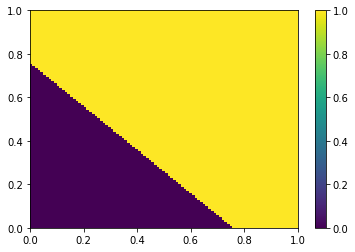

In [13]:
# create a heatmap
npoints = 100
# create 1d grids in x0 and x1 directions
X0lin = np.linspace(0,1,npoints)
X1lin = np.linspace(0,1,npoints)
# create 2d grids for x0 and x1 and reshape into 1d grids 
X0grid,X1grid = np.meshgrid(X0lin,X1lin)
# convert to 1d grids
X0reshape = np.reshape(X0grid,(1,npoints*npoints))
X1reshape = np.reshape(X1grid,(1,npoints*npoints))
# Xmatrix is a 2d grid (2,npoints*npoints)
Xmatrix = np.concatenate((X0reshape,X1reshape),axis=0)
# compute Y
Yout = func_Y(Xmatrix)
# reshape Yout results into 2d grid and plot heatmap
heatmap = np.reshape(Yout,(npoints,npoints))
# heat map takes in 2d grids for X0, X1, and Y values
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()

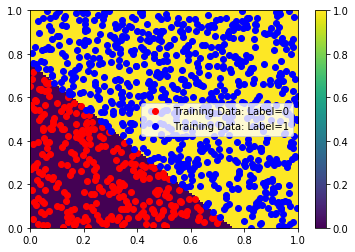

In [14]:
# plot data and heat map on same plot (data will be training data and heatmap will show results of machine learning)
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()
plt.legend()